## B.1 Geopandas

GeoPandas es una biblioteca de Python de código abierto que se utiliza para trabajar con datos geoespaciales. Esta biblioteca se basa en las bibliotecas de Pandas y Shapely y proporciona una manera fácil de manejar datos geoespaciales de una manera similar a como se manejan los datos tabulares en Pandas.

GeoPandas permite la lectura, escritura y manipulación de datos geoespaciales en diferentes formatos como Shapefile, GeoJSON y otros. También proporciona herramientas para realizar operaciones espaciales y de análisis de datos, como intersectar, unir y agrupar datos basados en la ubicación espacial.

GeoPandas se utiliza comúnmente en aplicaciones de análisis de datos geoespaciales, visualización y mapeo, así como en aplicaciones de aprendizaje automático que utilizan datos geoespaciales.

In [1]:
#! pip install geopandas
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## B.2 Formatos de archivo geoespaciales

Existen varios formatos de archivo geoespacial que se utilizan para almacenar y compartir datos geográficos. Algunos de los formatos de archivo geoespacial más comunes son:

* Shapefile: Es un formato de archivo vectorial desarrollado por Esri, que se utiliza comúnmente en sistemas de información geográfica (SIG) para almacenar datos geográficos. Los shapefiles pueden contener puntos, líneas y polígonos, y se utilizan comúnmente para representar características geográficas como ríos, carreteras, edificios, etc.
* GeoJSON: Es un formato de archivo de datos geoespaciales en formato JSON (JavaScript Object Notation), que se utiliza para almacenar datos vectoriales. GeoJSON se utiliza comúnmente en aplicaciones web y móviles para visualizar datos geográficos.
* DBF (DataBase File): Es un formato de archivo utilizado para almacenar datos tabulares en un archivo de base de datos. Fue desarrollado por la empresa de software dBase en los años 80, y se ha convertido en un formato común para el intercambio de datos entre diferentes programas de software.
* CSV: Es un formato de archivo de texto utilizado para almacenar datos tabulares, incluyendo datos geoespaciales. Los datos geoespaci
* KML/KMZ: Es un formato de archivo desarrollado por Google para almacenar datos geográficos en 3D, como modelos de terreno, edificios y objetos. Los archivos KML se pueden ver en Google Earth y en otras aplicaciones SIG.
* GML: Es un formato de archivo XML (Extensible Markup Language) utilizado para intercambiar datos geoespaciales entre diferentes aplicaciones SIG.ales en formato CSV suelen incluir coordenadas geográficas, como latitud y longitud.
* TopoJSON: Es un formato de archivo de datos geoespaciales que utiliza la topología para representar datos geográficos. TopoJSON se utiliza comúnmente para visualizar mapas en línea, ya que los archivos TopoJSON son más pequeños que los archivos GeoJSON.

Los archivos geoespaciales se pueden obtener de diversas fuentes, como:

* Sitios web gubernamentales: Muchos gobiernos a nivel local, regional o nacional publican datos geoespaciales en línea de forma gratuita. Estos datos pueden incluir información sobre carreteras, ríos, límites de parcelas, edificios, entre otros.
* Organizaciones sin fines de lucro: Hay organizaciones sin fines de lucro que recopilan y publican datos geoespaciales para proyectos específicos. Por ejemplo, la Fundación OpenStreetMap proporciona datos geoespaciales de todo el mundo que se pueden descargar de forma gratuita.
* Servicios de mapas en línea: Algunos servicios de mapas en línea, como Google Maps, ofrecen herramientas para descargar datos geoespaciales en varios formatos. Sin embargo, es posible que se deba pagar una tarifa o cumplir ciertos requisitos para acceder a los datos.
* Comunidades de desarrolladores de software: Hay comunidades de desarrolladores de software que comparten datos geoespaciales y herramientas de código abierto. Algunos ejemplos incluyen GitHub, GIS Stack Exchange y OpenTopography.

En general, el tipo y obtención de archivos geoespaciales depende del tipo de datos que se necesiten y del propósito de su uso.

En este caso utilizaremos dos conjuntos de datos geoespaciales obtenidos del INEGI. El Instituto Nacional de Estadística y Geografía (INEGI) es una entidad gubernamental en México que se encarga de producir información estadística y geográfica confiable y relevante para la toma de decisiones en diversos ámbitos del país. 

En este caso utilizaremos dos conjuntos de datos de México a nivel municipal, los cuales fueron previamente descargados y seleccionados.

El [Marco Geoestadístico (MGN)](https://www.inegi.org.mx/temas/mg/#Descargas) es un sistema único y de carácter nacional diseñado por el INEGI, el cual presenta la división del territorio nacional en diferentes niveles de desagregación para referir geográficamente la información estadística de los censos y encuestas institucionales y de las Unidades del Estado, que se integra al Sistema Nacional de Información Estadística y Geográfica (SNIEG).

El MGN incluye varias categorías de unidades territoriales, como regiones geográficas, estados, municipios, localidades, secciones censales y manzanas, entre otros. Cada una de estas categorías se define por una serie de características geográficas, como su ubicación, tamaño, población y otras características relevantes. Esta estructura jerárquica permite que la información geoespacial se clasifique y se organize de manera lógica y sistemática, facilitando el análisis y la toma de decisiones.

Los datos del MGN a nivel nacional se encuentran en un archivo zip, el cual incluye la tabla y los polígonos que definen los municipios. Para leer el archivo usamos el comando `gpd.read_file()`. Dada la diversidad de formatos se recomienda leer la [documentación de geopandas](https://geopandas.org/en/stable/docs/user_guide/io.html#).

In [2]:
mg_mun = gpd.read_file("data_raw/mg_mun.zip")
mg_mun.set_index('CVEGEO', inplace=True)
mg_mun

,CVE_ENT,CVE_MUN,NOMGEO,geometry
CVEGEO,,,,
01,01,NaN,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248..."
01001,01,001,Aguascalientes,"POLYGON ((2489072.503 1115771.584, 2489352.774..."
01002,01,002,Asientos,"POLYGON ((2494680.261 1141224.505, 2494749.948..."
01003,01,003,Calvillo,"POLYGON ((2429607.454 1120262.254, 2429071.902..."
01004,01,004,Cosío,"POLYGON ((2470517.824 1155028.588, 2470552.248..."
...,...,...,...,...
32054,32,054,Villa Hidalgo,"POLYGON ((2531223.368 1166188.348, 2531242.386..."
32055,32,055,Villanueva,"POLYGON ((2420011.778 1183552.394, 2420043.461..."
32056,32,056,Zacatecas,"POLYGON ((2421707.751 1202019.971, 2421780.086..."


El [Catálogo de Localidad Geoestadística (CLG)](https://www.inegi.org.mx/app/ageeml/) contiene el catálogo de claves y los registros de la publicación del Censo de Población y Vivienda 2020, Principales resultados por localidad del corte de Diciembre 2020. Estos datos están referenciados usando em marco geoestadístico.

Este conjunto de datos incluye:
* CVEGEO: clave geográfica, la cual une las claves de entidad y municipio
* CVE_ENT: clave del estado según el MGN, consta de dos caracterés numéricos
* NOM_ENT: nombre del estado según el MGN
* NOM_ABR: abreviatura del estado según el MGN
* CVE_MUN: clave de municipio según el MGN, consta de dos caracterés numéricos
* NOM_MUN: nombre de municipio según el MGN
* CVE_CAB: clave de la localidad que es la cabezera municipal según el MGN, consta de dos caracterés numéricos
* NOM_CAB: nombre de la localidad que es la cabezera municipal según el MGN
* POB_TOTAL: población total del municipio de acuerdo al censo 2020
* POB_MASCULI: población masculina del municipio de acuerdo al censo 2020
* POB_FEMENIN: población femenina del municipio de acuerdo al censo 2020
* TOTAL DE VI: total de viviendas del municipio de acuerdo al censo 2020
* LATITUD: latitud de la localidad que es la cabezera municipal en grados
* LONGITUD: longitud de la localidad que es la cabezera municipal en grados
* LAT_DECIMAL: latitud de la localidad que es la cabezera municipal en formato decimal
* LON_DECIMAL: longitud de la localidad que es la cabezera municipal en formato decimal
* ALTITUD: altitud de la localidad que es la cabezera municipal en metros sobre el nivel del mar

In [3]:
cat_mun = pd.read_csv("data_raw/catun_mun.csv",  dtype=str)
cat_mun.set_index('CVEGEO', inplace=True)
for col in ['POB_TOTAL', 'POB_MASCULI', 'POB_FEMENIN', 'TOTAL DE VI', 'ALTITUD']:
    cat_mun[col] = pd.to_numeric(cat_mun[col], downcast='integer', errors='coerce')
cat_mun

,CVE_ENT,NOM_ENT,NOM_ABR,CVE_MUN,NOM_MUN,CVE_CAB,NOM_CAB,POB_TOTAL,POB_MASCULI,POB_FEMENIN,TOTAL DE VI,LATITUD,LONGITUD,LAT_DECIMAL,LON_DECIMAL,ALTITUD
CVEGEO,,,,,,,,,,,,,,,,
01001,01,Aguascalientes,Ags.,001,Aguascalientes,010010001,Aguascalientes,948990.0,462073.0,486917.0,266942.0,"21°52´47.362N""","102°17´45.768W""",21.879822,-102.296046,1878
01002,01,Aguascalientes,Ags.,002,Asientos,010020001,Asientos,51536.0,25261.0,26275.0,12544.0,"22°14´17.941N""","102°05´21.390W""",22.238317,-102.089275,2167
01003,01,Aguascalientes,Ags.,003,Calvillo,010030001,Calvillo,58250.0,28563.0,29687.0,15556.0,"21°50´48.866N""","102°43´07.502W""",21.846907,-102.71875,1634
01004,01,Aguascalientes,Ags.,004,Cosío,010040001,Cosío,17000.0,8292.0,8708.0,3938.0,"22°21´59.071N""","102°18´00.159W""",22.366409,-102.300044,2005
01005,01,Aguascalientes,Ags.,005,Jesús María,010050001,Jesús María,129929.0,64219.0,65710.0,33229.0,"21°57´40.582N""","102°20´36.299W""",21.961273,-102.343416,1877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32054,32,Zacatecas,Zac.,054,Villa Hidalgo,320540001,Villa Hidalgo,19446.0,9504.0,9942.0,4951.0,"22°21´25.518N""","101°42´45.356W""",22.357088,-101.712599,2161
32055,32,Zacatecas,Zac.,055,Villanueva,320550001,Villanueva,31558.0,15590.0,15968.0,9052.0,"22°21´15.331N""","102°53´01.414W""",22.354259,-102.883726,1900
32056,32,Zacatecas,Zac.,056,Zacatecas,320560001,Zacatecas,149607.0,71972.0,77635.0,42424.0,"22°46´33.946N""","102°34´18.611W""",22.776095,-102.571836,2427


### Ejercicio 1
* Exploren las páginal del [Marco Geoestadístico](https://www.inegi.org.mx/temas/mg/#Descargas) y el [Catálogo de Localidad Geoestadística](https://www.inegi.org.mx/app/ageeml/).
    * ¿Qué información contiene cada una?
    * ¿Qué opciones de busqueda y filtrado se tienen?
    * ¿Qué tipos de archivos se pueden descargar? 
    * ¿Cuál es la relación entre el tipo de archivo y el tipo de información que contiene?
* Las tablas tienen tamaño diferente.unir ¿A qué se debé esto?

## B.3 Información geoespacial 

Para trabajar con mapas en primer lugar es necesario tener información espacial. La información espacial es un tipo de información que se refiere a la ubicación y distribución de objetos, fenómenos o eventos en el espacio geográfico. Se trata de datos que están relacionados con la posición, la forma, la dimensión, la orientación y la topología de los objetos y características del terreno, y que se pueden representar mediante técnicas de cartografía y análisis espacial. La información espacial puede ser de diversos tipos, como mapas, fotografías aéreas, imágenes satelitales, modelos digitales del terreno, entre otros. Esta información es de gran importancia en diversas áreas, como la planificación urbana, la gestión ambiental, la agricultura, la seguridad pública, la navegación, la geología y la arqueología, entre otras, ya que permite tomar decisiones informadas y precisas basadas en la ubicación y distribución de los fenómenos en el espacio geográfico.

Hay varios tipos de información espacial, cada uno con sus propias características y aplicaciones. Los principales tipos son:
 * Puntos: La información espacial de punto representa una ubicación específica en un mapa. Los puntos se utilizan para representar objetos geográficos como edificios, árboles, farolas, entre otros. Los puntos pueden tener atributos asociados como el nombre del objeto o la dirección.
* Líneas: La información espacial de línea representa una serie de puntos conectados en un orden específico. Las líneas se utilizan para representar objetos geográficos como carreteras, ríos, límites de parcelas, etc. Las líneas pueden tener atributos asociados como el nombre de la carretera o el número de carriles.
* Polígonos: La información espacial de polígono representa un área cerrada en el mapa. Los polígonos se utilizan para representar objetos geográficos como parques, edificios, terrenos, etc. Los polígonos tienen atributos asociados como el nombre del parque o la dirección del edificio.
* Raster: La información espacial de raster representa un conjunto de celdas que cubren un área. Los datos raster se utilizan para representar información continua, como la elevación del terreno, la temperatura, la humedad, la densidad de población, etc. Los datos raster se almacenan como matrices de valores de píxeles.

<img src="./images/geospatial_datatypes.jpg" width="300">

Tipos de datos espaciales, tomado de [saylordotorg](https://saylordotorg.github.io/text_essentials-of-geographic-information-systems/s08-02-vector-data-models.html).

Cada tipo de información espacial tiene características únicas que la hacen adecuada para diferentes aplicaciones. Por ejemplo, los puntos son útiles para representar objetos específicos, mientras que los polígonos son útiles para representar áreas más grandes. Los datos raster son adecuados para datos continuos, mientras que los datos vectoriales son adecuados para datos discretos. La elección del tipo de información espacial depende del propósito y la aplicación específica de los datos geoespaciales.

Por ejemplo, el MGN incluye informacion estadística de la forma y localización de los municipios en tipo de dato `Polygon` en la columna `'geometry'`. En el caso de municipios con islas se usa el formato multipoligon para representarlaExtrass.

### Geoseries de polígonos

Una `GeoSeries` es esencialmente un vector donde cada entrada en el vector es un conjunto de formas correspondientes a una observación. Una entrada puede constar de una sola forma (como un solo polígono) o de varias formas que deben considerarse como una observación (como los muchos polígonos que conforman un municipio con islas). Un `GeoDataFrame` puede contener varias `GeoSeries` pero solo una de ellas se considera activa.

Para hacer un mapa se utiliza el comando `.plot()` con la opción `kind='geo'`. Por default, en un geodataframe el comando `.plot()` genera un mapa usando la serie de datos geográficos, aunque es posible hacer otros tipos de gráficos.

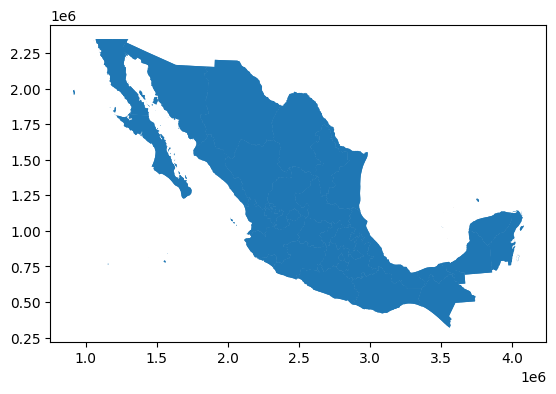

In [4]:
mg_mun.plot()
plt.show()

Es posible obtener los límites de los polígonos con `boundary`

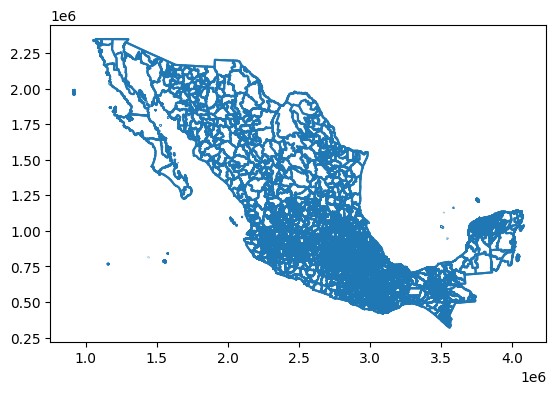

In [5]:
mg_mun.boundary.plot()
plt.show()

También se pueden obtener datos como el area, el centroide, etc. Les recomiendo leer la [documentación de geopandas](https://geopandas.org/en/stable/docs/user_guide/data_structures.html).

In [6]:
mg_mun['geometry'].area

CVEGEO
01       5.558674e+09
01001    1.166359e+09
01002    5.433743e+08
01003    9.233578e+08
01004    1.283835e+08
             ...     
32054    3.714260e+08
32055    2.156506e+09
32056    4.368210e+08
32057    2.184470e+08
32058    2.756666e+08
Length: 2507, dtype: float64

### Coordenadas a geoseries de puntos

En el caso del CLG también hay información espacial de latitud y longitud, las cuales pueden ser vistas como las coordenadas de un punto. Sin embargo, estos datos estan en tipo de datos `str` o `float` y no en un formato geospacial `point`. En este caso es necesario realizar una conversión de tipo de datos.

Para lograr esto convertiremos el dataframe cat_mun a un geodataframe y usaremos la función `gpd.points_from_xy()` y le especificaremos los datos de longitud y latitud.

Una cosa que es importante notar es si el sistema de coordenadas es equivalente. En general el INEGI usa WGS84 latitud/longitud "EPSG:4326". Este se establece con el comando `.set_crs()`. 

**Nota**


In [7]:
cat_mun = gpd.GeoDataFrame(cat_mun, 
                           geometry=gpd.points_from_xy(
                                cat_mun['LON_DECIMAL'], 
                                cat_mun['LAT_DECIMAL'])
                          )
cat_mun = cat_mun.set_crs("EPSG:4326")
cat_mun[['LAT_DECIMAL', 'LON_DECIMAL', 'geometry']]

,LAT_DECIMAL,LON_DECIMAL,geometry
CVEGEO,,,
01001,21.879822,-102.296046,POINT (-102.29605 21.87982)
01002,22.238317,-102.089275,POINT (-102.08928 22.23832)
01003,21.846907,-102.71875,POINT (-102.71875 21.84691)
01004,22.366409,-102.300044,POINT (-102.30004 22.36641)
01005,21.961273,-102.343416,POINT (-102.34342 21.96127)
...,...,...,...
32054,22.357088,-101.712599,POINT (-101.71260 22.35709)
32055,22.354259,-102.883726,POINT (-102.88373 22.35426)
32056,22.776095,-102.571836,POINT (-102.57184 22.77610)


## B.4 Mapas

Con Geopandas se pueden crear una variedad de gráficos de mapas para visualizar datos geográficos y su distribución espacial. Algunos de los tipos de gráficos de mapas que se pueden crear con Geopandas son:

* Mapas de choropleth: Son mapas temáticos que representan la distribución espacial de datos cuantitativos agregados por áreas geográficas, como estados, municipios o distritos. La intensidad del color o el tono en cada área del mapa se utiliza para representar el valor de la variable que se está visualizando.
* Mapas de puntos: Muestran la ubicación de puntos en el mapa, que pueden representar puntos de interés, como tiendas, estaciones de transporte, edificios, entre otros. Los puntos se pueden representar con diferentes colores y tamaños para visualizar diferentes variables.
* Mapas de líneas: Representan líneas geográficas, como ríos, carreteras, límites de estados o países, entre otros. Las líneas se pueden etiquetar y colorear según diferentes variables para visualizar patrones o tendencias.
* Mapas de hexágonos: Son mapas de calor que dividen el área geográfica en hexágonos regulares y utilizan la intensidad del color para representar la densidad de los datos.
* Mapas de contorno: Representan las curvas de nivel de las elevaciones del terreno utilizando líneas de contorno. Los mapas de contorno se utilizan comúnmente en la planificación urbana, la ingeniería y la geología.

Agreguemos los datos del censo al dataframe con los polígonos

In [8]:
mg_mun = mg_mun.merge(cat_mun[['POB_TOTAL', 'POB_MASCULI', 'POB_FEMENIN', 'TOTAL DE VI', 'ALTITUD']], 
                      how='outer', left_index=True, right_index=True)
mg_mun

,CVE_ENT,CVE_MUN,NOMGEO,geometry,POB_TOTAL,POB_MASCULI,POB_FEMENIN,TOTAL DE VI,ALTITUD
CVEGEO,,,,,,,,,
01,01,NaN,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248...",NaN,NaN,NaN,NaN,NaN
01001,01,001,Aguascalientes,"POLYGON ((2489072.503 1115771.584, 2489352.774...",948990.0,462073.0,486917.0,266942.0,1878.0
01002,01,002,Asientos,"POLYGON ((2494680.261 1141224.505, 2494749.948...",51536.0,25261.0,26275.0,12544.0,2167.0
01003,01,003,Calvillo,"POLYGON ((2429607.454 1120262.254, 2429071.902...",58250.0,28563.0,29687.0,15556.0,1634.0
01004,01,004,Cosío,"POLYGON ((2470517.824 1155028.588, 2470552.248...",17000.0,8292.0,8708.0,3938.0,2005.0
...,...,...,...,...,...,...,...,...,...
32054,32,054,Villa Hidalgo,"POLYGON ((2531223.368 1166188.348, 2531242.386...",19446.0,9504.0,9942.0,4951.0,2161.0
32055,32,055,Villanueva,"POLYGON ((2420011.778 1183552.394, 2420043.461...",31558.0,15590.0,15968.0,9052.0,1900.0
32056,32,056,Zacatecas,"POLYGON ((2421707.751 1202019.971, 2421780.086...",149607.0,71972.0,77635.0,42424.0,2427.0


Ahora, grafiquemos el mapa codificando la columna de altitud con una escala de color. Por default `geopandas` usa los mismos parametros que `matplotlib`, por lo que se recomienda cambiar el cmap.

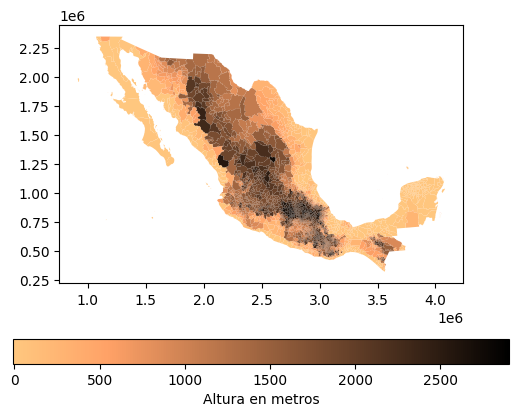

In [9]:
fig, ax = plt.subplots(1, 1)
mg_mun.plot(column='ALTITUD', ax=ax, cmap='copper_r', legend=True, 
            legend_kwds={'label': 'Altura en metros',
                        'orientation': 'horizontal'})
plt.show()

Es posible hacer un mapa con multiples capas de datos. En primer lugar es necesario asegurarse que ambos conjuntos de datos tienen el mismo CRS.

In [10]:
cat_mun = cat_mun.to_crs(mg_mun.crs)

Después se genera un plot con la capa base y se pasa ese plot como axes al segundo plot.

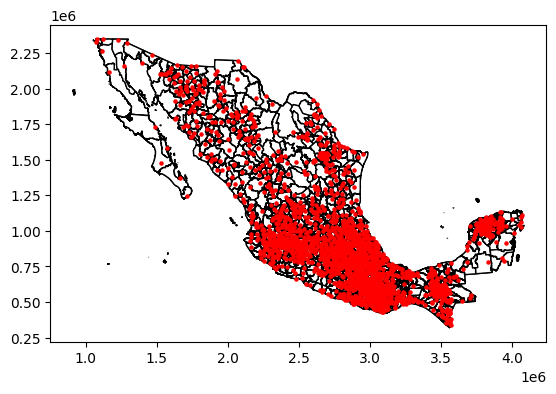

In [11]:
base = mg_mun.plot(color='white', edgecolor='black')
cat_mun.plot(ax=base, marker='o', color='red', markersize=5)
plt.show()

Es posible seleccionar partes del mapa a visualizar usando `xlim` y `ylim`. Ten cuidado con usa coordenadas y verificar el orden de magnitud.

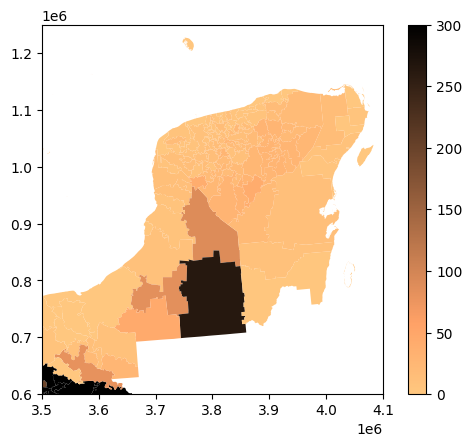

In [12]:
fig, ax = plt.subplots(1, 1)
mg_mun.plot(column='ALTITUD', ax=ax, legend=True, 
            cmap='copper_r', vmin=0, vmax=300)
ax.set_xlim(3500000, 4100000)
ax.set_ylim( 600000, 1250000)
plt.show()

Existen muchas posibilidades de mapas, incluyendo leyendas, datos faltantes, etc. Les recomiendo leer la [documentación de mapas de geopandas](https://geopandas.org/en/stable/docs/user_guide/mapping.html)

### Ejercicio 2

El dataframe `mg_mun` contiene los polígonos de los estados y los municipios.
1. Separa en dos tablas los poligonos de estados y municipios
2. Genera un mapa de lineas con los limites de los estados en negro grueso y los límites de los municipios en gris claro
3. Grafica las ciudades
4. Selecciona un estado y fija los límites del mapa en ese estado
Nota: ten cuidado con el orden en el que se grafican los mapas.

In [13]:
mg_ent = mg_mun[mg_mun['CVE_MUN'].isna()].dropna(how='all',axis=1)
mg_mun = mg_mun[mg_mun['CVE_MUN'].notna()]

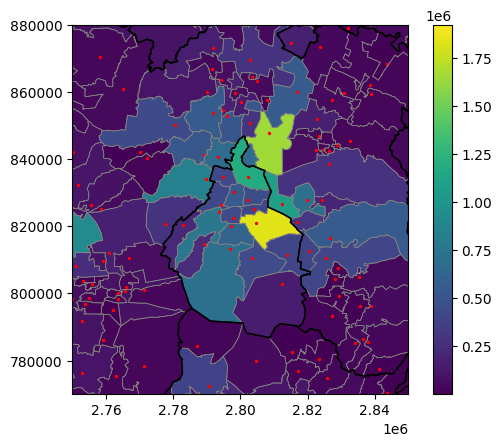

In [24]:
fig, ax = plt.subplots(1, 1)
base_pob = mg_mun.plot(ax=ax, column='POB_TOTAL', cmap='viridis', legend=True)
base_mun = mg_mun.boundary.plot(ax=base_pob, edgecolor='gray', linewidth=0.5)
base_ent = mg_ent.boundary.plot(ax=base_mun, edgecolor='black', linewidth=1)
cabezera = cat_mun.plot(ax=base_ent, marker='o', color='red', markersize=2)
ax.set_xlim(2750000, 2850000)
ax.set_ylim( 770000,  880000)
plt.show()

## Temas adicionales

Un [Coordenadas de Sistema de Referencia (CSR)](https://geopandas.org/en/stable/docs/user_guide/projections.html#coordinate-reference-systems) es un conjunto de reglas y procedimientos que se utilizan para definir y representar la ubicación de objetos y características en la Tierra. Un CSR define un sistema de coordenadas, que es un conjunto de líneas imaginarias que se utilizan para dividir la superficie de la Tierra en regiones más pequeñas y fáciles de ubicar. Los sistemas de referencia pueden ser locales, regionales o globales, y se utilizan en diversas áreas, como la cartografía, la topografía, la geología, la navegación y la ingeniería, entre otras. Los CSR suelen incluir información sobre la forma y el tamaño de la Tierra, así como la ubicación y orientación de las líneas de coordenadas. La elección del CSR adecuado es fundamental para la representación precisa y coherente de la información espacial.

Geopandas incluye soporte de [mapas interactivos](https://geopandas.org/en/stable/docs/user_guide/interactive_mapping.html) y para descargar bases de mapas de portales públicos como Google Maps y Open Street Map. También permite convertir un nombre de un lugar en una localización geográfica usando [geocoding](https://geopandas.org/en/stable/docs/user_guide/geocoding.html). 

Estos temas estan fuera del alcance del tutorial pero les dejamos los links a la documentación.